# Sepsis prediction from clinical data

Sepsis is a life-threatening condition that occurs when the body's response to infection causes tissue damage, organ failure, or death ([source](https://doi.org/10.13026/v64v-d857)). Internationally, an estimated 30 million people develop sepsis and 6 million people die from sepsis each year; an estimated 4.2 million newborns and children are affected ([WHO](https://www.who.int/news-room/fact-sheets/detail/sepsis)). Early detection and antibiotic treatment of sepsis are critical for improving sepsis outcomes, where each hour of delayed treatment has been associated with roughly an 4-8% increase in mortality ([source](https://doi.org/10.13026/v64v-d857)).

In this notebook I will do exploratory analysis of clinical data and will try to develop the best model for early prediction of the sepsis among patients.

# Contents
1. [Exploratory Data Analysis](#EDA)
2. [Feature Engineering](#FE)
3. [Model Selection](#MS)
4. [Tunning the model's hyperparameters](#FTSM)

**Import libraries:**

In [1]:
# data manipulation libraries
import numpy as np # linear algebra 
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns # used for drawing informative and attractive statistical graphics. Used for creating visually appealing plots.

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer # applying a function to the data for custom data transformations
from sklearn.pipeline import Pipeline # it is used to define a sequence of data processing steps, making it easier to manage complex workflows.
from sklearn.impute import SimpleImputer # imputing missing values in a dataset
from sklearn.preprocessing import OneHotEncoder # converting categorical features into encoded format
from sklearn.compose import ColumnTransformer # apply transformers different columns or subsets of columns in a dataset
from sklearn.preprocessing import StandardScaler # scaling numerical features to have mean of 0 and a standard deviation of 1
from sklearn.preprocessing import OrdinalEncoder # to encode ordinal categorical features into integers 


from sklearn.linear_model import LogisticRegression # Classification algorithm for binary and multiclass problems 
from sklearn.neural_network import MLPClassifier # is a class in scikit-learn for building Multi-Layer Perception(MLP) neural networks for classification tasks

from sklearn.model_selection import cross_validate # helps to evaluate the performance of a machine learning model
from sklearn.metrics import f1_score # metric used to evaluate the performance of a classification model

**Load data:**

In [2]:
dataSepsis = pd.read_csv("C:/Users//shant//OneDrive//Desktop//Major Project//prediction-of-sepsis//dataset//dataSepsis.csv", sep=";")

<a id="EDA"></a>
# 1. Exploratory Data Analysis

First, let's get a cursory overview of the data with Pandas methods `head()`, `info()`, and `describe()`:

In [3]:
dataSepsis.head(15).T # this will show 15 rows of your DataFrame with columns as rows and rows as columns, making it easier to inspect data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
HR,103.00,58.00,91.00,92.00,155.50,73.00,NaN,82.00,89.00,100.00,95.00,86.00,88.00,116.00,110.00
O2Sat,90.00,95.00,94.00,100.00,94.50,99.00,NaN,100.00,100.00,95.00,100.00,96.00,100.00,97.00,99.00
Temp,NaN,36.11,38.50,NaN,NaN,36.06,NaN,35.50,NaN,37.28,NaN,38.00,36.30,38.28,36.40
SBP,NaN,143.00,133.00,NaN,147.50,100.00,NaN,112.00,141.00,121.00,89.00,111.00,99.00,200.00,116.00
MAP,NaN,77.00,74.00,NaN,102.00,67.00,NaN,79.50,85.00,20.00,62.33,66.00,66.00,108.00,219.00
DBP,NaN,47.00,48.00,NaN,NaN,49.50,NaN,63.00,57.00,NaN,NaN,49.00,52.00,90.00,66.00
Resp,30.00,11.00,34.00,NaN,33.00,16.50,NaN,14.00,17.00,NaN,18.00,17.00,16.00,24.00,19.00
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,21.00,NaN,NaN,NaN,-12.00,-8.00,0.00,0.00,1.00,NaN,NaN,1.00,-3.00,6.00,-8.00
HCO3,45.00,22.00,31.00,29.00,13.00,16.00,25.00,23.00,25.00,22.00,22.00,27.00,20.00,NaN,19.00


Dataset contains data of 36 thousand patients. Each patient is represented by 41 features.

In [4]:
dataSepsis.info() # provides information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

`dataSepsis.isna()`: This part of the code creates a Boolean DataFrame where each element is True if the corresponding element in the dataSepsis DataFrame is missing (NaN), and False otherwise.

`.sum(axis=0)`: This part sums the True values (missing values) along each column (axis 0), resulting in a Series that shows the count of missing values in each column.

`.sort_values(ascending=False)`: It sorts the Series in descending order, so columns with the most missing values will appear at the top.

`/ len(dataSepsis) * 100`: It divides the count of missing values in each column by the total number of rows in the DataFrame (len(dataSepsis)) and multiplies by 100 to calculate the percentage of missing values in each column.

In [5]:
dataSepsis.isna().sum(axis = 0).sort_values(ascending=False) / len(dataSepsis) * 100

Bilirubin_direct    96.881715
EtCO2               95.556719
Fibrinogen          94.102253
TroponinI           89.681009
Lactate             88.612198
SaO2                88.058509
FiO2                82.295741
BaseExcess          80.210457
PaCO2               76.778139
pH                  74.599196
Alkalinephos        71.712302
Bilirubin_total     71.591097
AST                 71.376233
PTT                 61.778965
HCO3                53.214699
Temp                52.892403
Chloride            52.165170
Phosphate           40.036362
Unit2               38.788497
Unit1               38.788497
Magnesium           23.775550
DBP                 23.097901
Calcium             21.153105
WBC                 13.338108
Platelets           13.313316
Hgb                 12.357446
Hct                 11.354746
Creatinine          11.134373
BUN                 10.401631
Potassium            9.897526
Glucose              8.387968
Resp                 6.644262
SBP                  4.641618
O2Sat     

In [6]:
# it provides thwe number of unique values in each column of the DataFrame(dataSepsis)
# it helps to understand the diversity of values in each feature.
# It will return a Series with the count of unique values for each column.
dataSepsis.nunique()

HR                    248
O2Sat                  69
Temp                  292
SBP                   427
MAP                   537
DBP                   253
Resp                  132
EtCO2                  91
BaseExcess            134
HCO3                  118
FiO2                   57
pH                     80
PaCO2                 269
SaO2                  216
AST                   916
BUN                   200
Alkalinephos          547
Calcium               408
Chloride               69
Creatinine           1072
Bilirubin_direct      165
Glucose               751
Lactate               585
Magnesium              69
Phosphate             149
Potassium             243
Bilirubin_total       252
TroponinI             871
Hct                   552
Hgb                   248
PTT                   938
WBC                   576
Fibrinogen            580
Platelets             788
Age                  5835
Gender                  2
Unit1                   2
Unit2                   2
HospAdmTime 

### Attributes:
List all the attributes in the dataset. Label continuous attributes with *c* and discrete with *d*

**Vital signs (columns 1-8)** <br>
HR - Heart rate (beats per minute); <br>
O2Sat - Pulse oximetry (%); <br>
Temp - Temperature (Deg C)<br>
SBP - Systolic BP (mm Hg)<br>
MAP - Mean arterial pressure (mm Hg)<br>
DBP - Diastolic BP (mm Hg)<br>
Resp - Respiration rate (breaths per minute)<br>
EtCO2 - End tidal carbon dioxide (mm Hg)<br><br>
**Laboratory values (columns 9-34)**<br>
BaseExcess - Measure of excess bicarbonate (mmol/L)<br>
HCO3 - Bicarbonate (mmol/L)<br>
FiO2 - Fraction of inspired oxygen (%)<br>
pH - N/A<br>
PaCO2 - Partial pressure of carbon dioxide from arterial blood (mm Hg)<br>
SaO2 - Oxygen saturation from arterial blood (%)<br>
AST - Aspartate transaminase (IU/L)<br>
BUN - Blood urea nitrogen (mg/dL)<br>
Alkalinephos - Alkaline phosphatase (IU/L)<br>
Calcium - (mg/dL)<br>
Chloride - (mmol/L)<br>
Creatinine - (mg/dL)<br>
Bilirubin_direct - Bilirubin direct (mg/dL)<br>
Glucose - Serum glucose (mg/dL)<br>
Lactate - Lactic acid (mg/dL)<br>
Magnesium - (mmol/dL)<br>
Phosphate - (mg/dL)<br>
Potassium - (mmol/L)<br>
Bilirubin_total - Total bilirubin (mg/dL)<br>
TroponinI - Troponin I (ng/mL)<br>
Hct - Hematocrit (%)<br>
Hgb - Hemoglobin (g/dL)<br>
PTT - partial thromboplastin time (seconds)<br>
WBC - Leukocyte count (count*10^3/µL)<br>
Fibrinogen - (mg/dL)<br>
Platelets - (count*10^3/µL)<br><br>
**Demographics (columns 35-40)**<br>
Age - Years (100 for patients 90 or above)<br>
Gender - Female (0) or Male (1)<br>
Unit1 - Administrative identifier for ICU unit (MICU)<br>
Unit2 - Administrative identifier for ICU unit (SICU)<br>
HospAdmTime - Hours between hospital admit and ICU admit<br>
ICULOS - ICU length-of-stay (hours since ICU admit)<br><br>
**Outcome (column 41)** <br>
SepsisLabel - For sepsis patients, `SepsisLabel` is $1$ if $t≥t_{sepsis}-6$ and $0$ if $t<t_{sepsis}−6$. <br>
For non-sepsis patients, `SepsisLabel` is $0$.

In [7]:
# display a DataFrame where each row corresponds to a summary statistic (e.g., count, mean, standard deviation, minimum, and quartiles) for the numerical columns, and unique, top, and frequency for the categorical columns. The .T at the end transposes the result so that columns become rows
dataSepsis.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
HR,35506.0,83.547246,17.486670,26.00,71.00,82.000,94.0000,184.00
O2Sat,34736.0,97.444337,2.827282,27.00,96.00,98.000,100.0000,100.00
Temp,17101.0,36.824187,0.855630,26.67,36.30,36.800,37.3900,41.80
SBP,34617.0,122.625064,23.092558,32.00,106.00,120.000,137.0000,281.00
MAP,34846.0,82.263649,16.876642,20.00,71.00,80.000,91.3300,291.00
DBP,27917.0,63.793506,14.130816,22.00,54.00,62.000,72.0000,281.00
Resp,33890.0,18.041841,5.020912,1.00,15.00,18.000,20.5000,59.00
EtCO2,1613.0,32.402046,7.947214,10.00,28.00,33.000,37.5000,97.00
BaseExcess,7184.0,-0.306508,4.151943,-29.00,-2.00,0.000,2.0000,36.00
HCO3,16984.0,24.255841,4.150083,5.00,22.00,24.000,26.0000,55.00


Compute share of missing values for each feature (%):

In [8]:
# Display the count of each unique value in the "isSepsis" column. This can be helpful for understanding the class distribution if "isSepsis" represents a binary classification target variable (e.g., 0 for non-sepsis and 1 for sepsis).
dataSepsis["isSepsis"].value_counts()

isSepsis
0    33655
1     2647
Name: count, dtype: int64

### Early summary:
+ Most of the features are continuous with only **gender**, **Unit1**, **Unit2**, and target **isSepsis** represented by discrete values. In total 39 continuous features, 2 categorical.
+ A lot of features miss more than half of values, with **Bilirubin_direct** missing as much as 97%. We may expect that these rare values were measured because some kind of abnormality was expected hence non-missing values may be non-representative of the total population.
+ A lot of negative values in **HospAdmTime** which probably means that the patient was first delivered to ICU and some time later released from ICU to a hospital. Positive values mean that the patient has gotten to ICU after spending some time in a hospital. This is just an assumption, however, an should be checked.
+ **Unit1** and **Unit2** stand for ICU units. Based on them we can find out, whether that person has had to be put in MICU (medical intensive care unit) or SICU (surgical intensive care unit).
+ Septic patients constitute only 7% of the total dataset we have to take this into account when selecting a model

Now we should split the data into train and test data and put test data aside until we have a trained model.

---

`dataSepsis.drop("isSepsis", axis=1)`: This part selects the features (independent variables) by dropping the "isSepsis" column from the dataSepsis DataFrame. This is the X (input features) for your machine learning model.

`dataSepsis["isSepsis"]`: This selects the target variable (the variable you want to predict), which is "isSepsis" in this case. This is the y (output or target) for your machine learning model.

`test_size=0.1`: This parameter specifies that 10% of the data will be used for testing, and the remaining 90% will be used for training.

`random_state=42`: This parameter sets a random seed for reproducibility. If you use the same random_state, you will get the same split every time you run the code.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataSepsis.drop("isSepsis", axis=1), dataSepsis["isSepsis"], test_size=0.1, random_state=42)

## Visualise the data

In [10]:
# set plots style
sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

### Visualise **vital signs**:

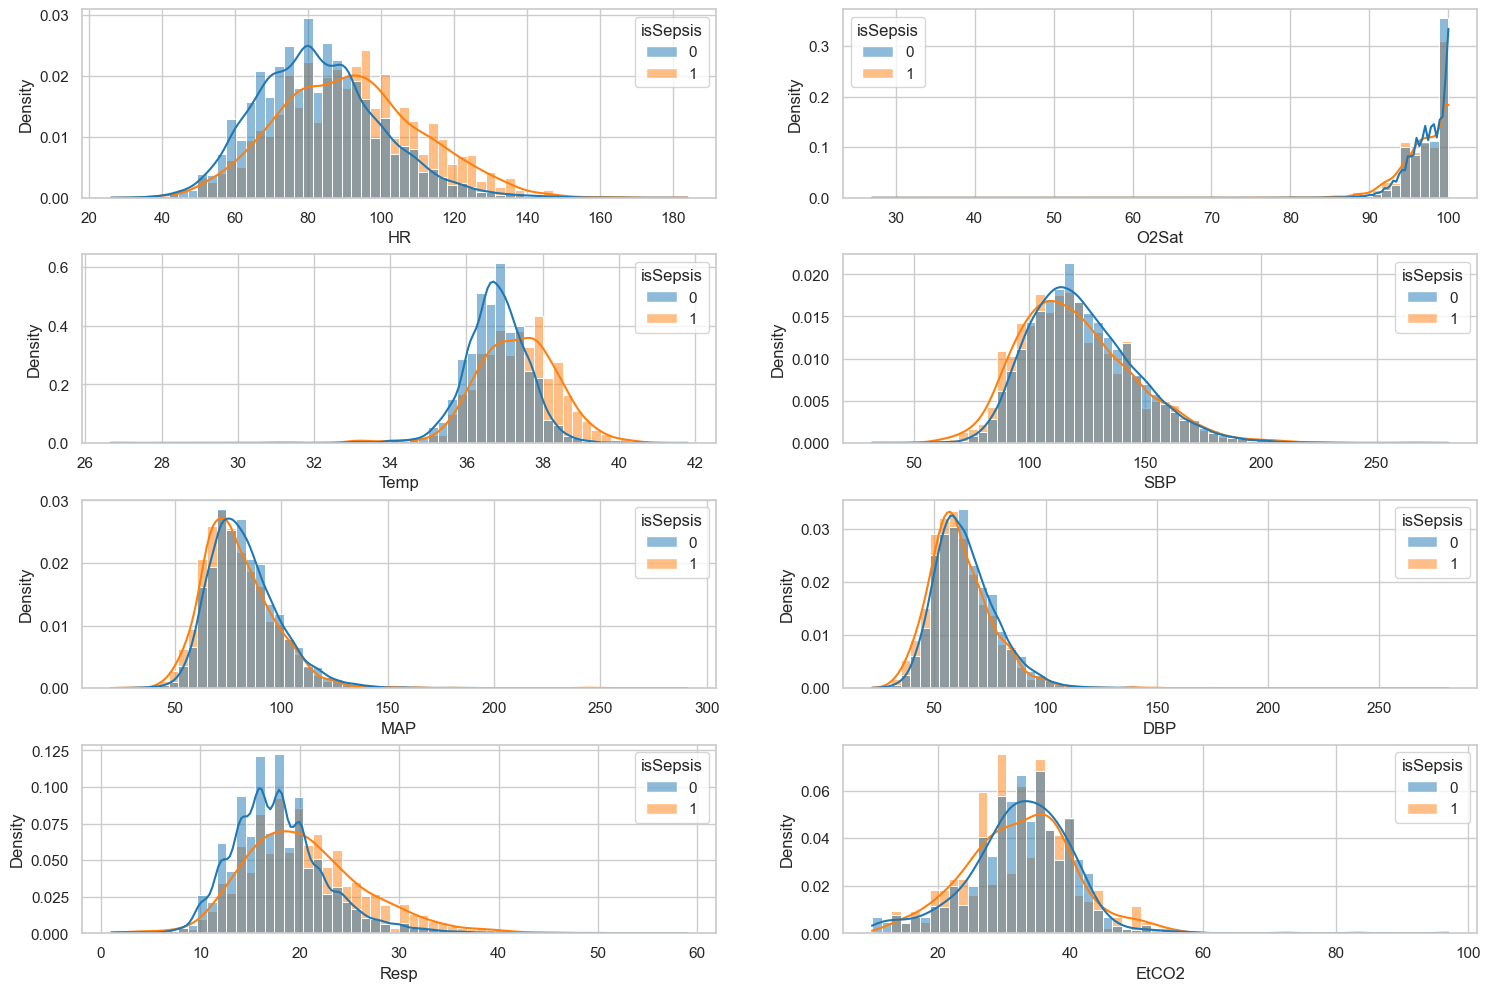

In [11]:
#X_train.columns

# vital_signs: define a list of vital signs to visualize in the histograms 
vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

# plt.figure(figsize=(18,12)): sets the overall size of the figure where the histograms will be displayed
plt.figure(figsize=(18,12))

# plt.subplots_adjust(hspace = .3): adjusts the vertical space between subplots to prevent overlapping.
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):

    # plt.subplot(4, 2, i) to arrange it in a 4x2 grid.
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)
    
#plt.savefig("vital_signs.png", dpi=400)

### Visualize **laboratory values**:

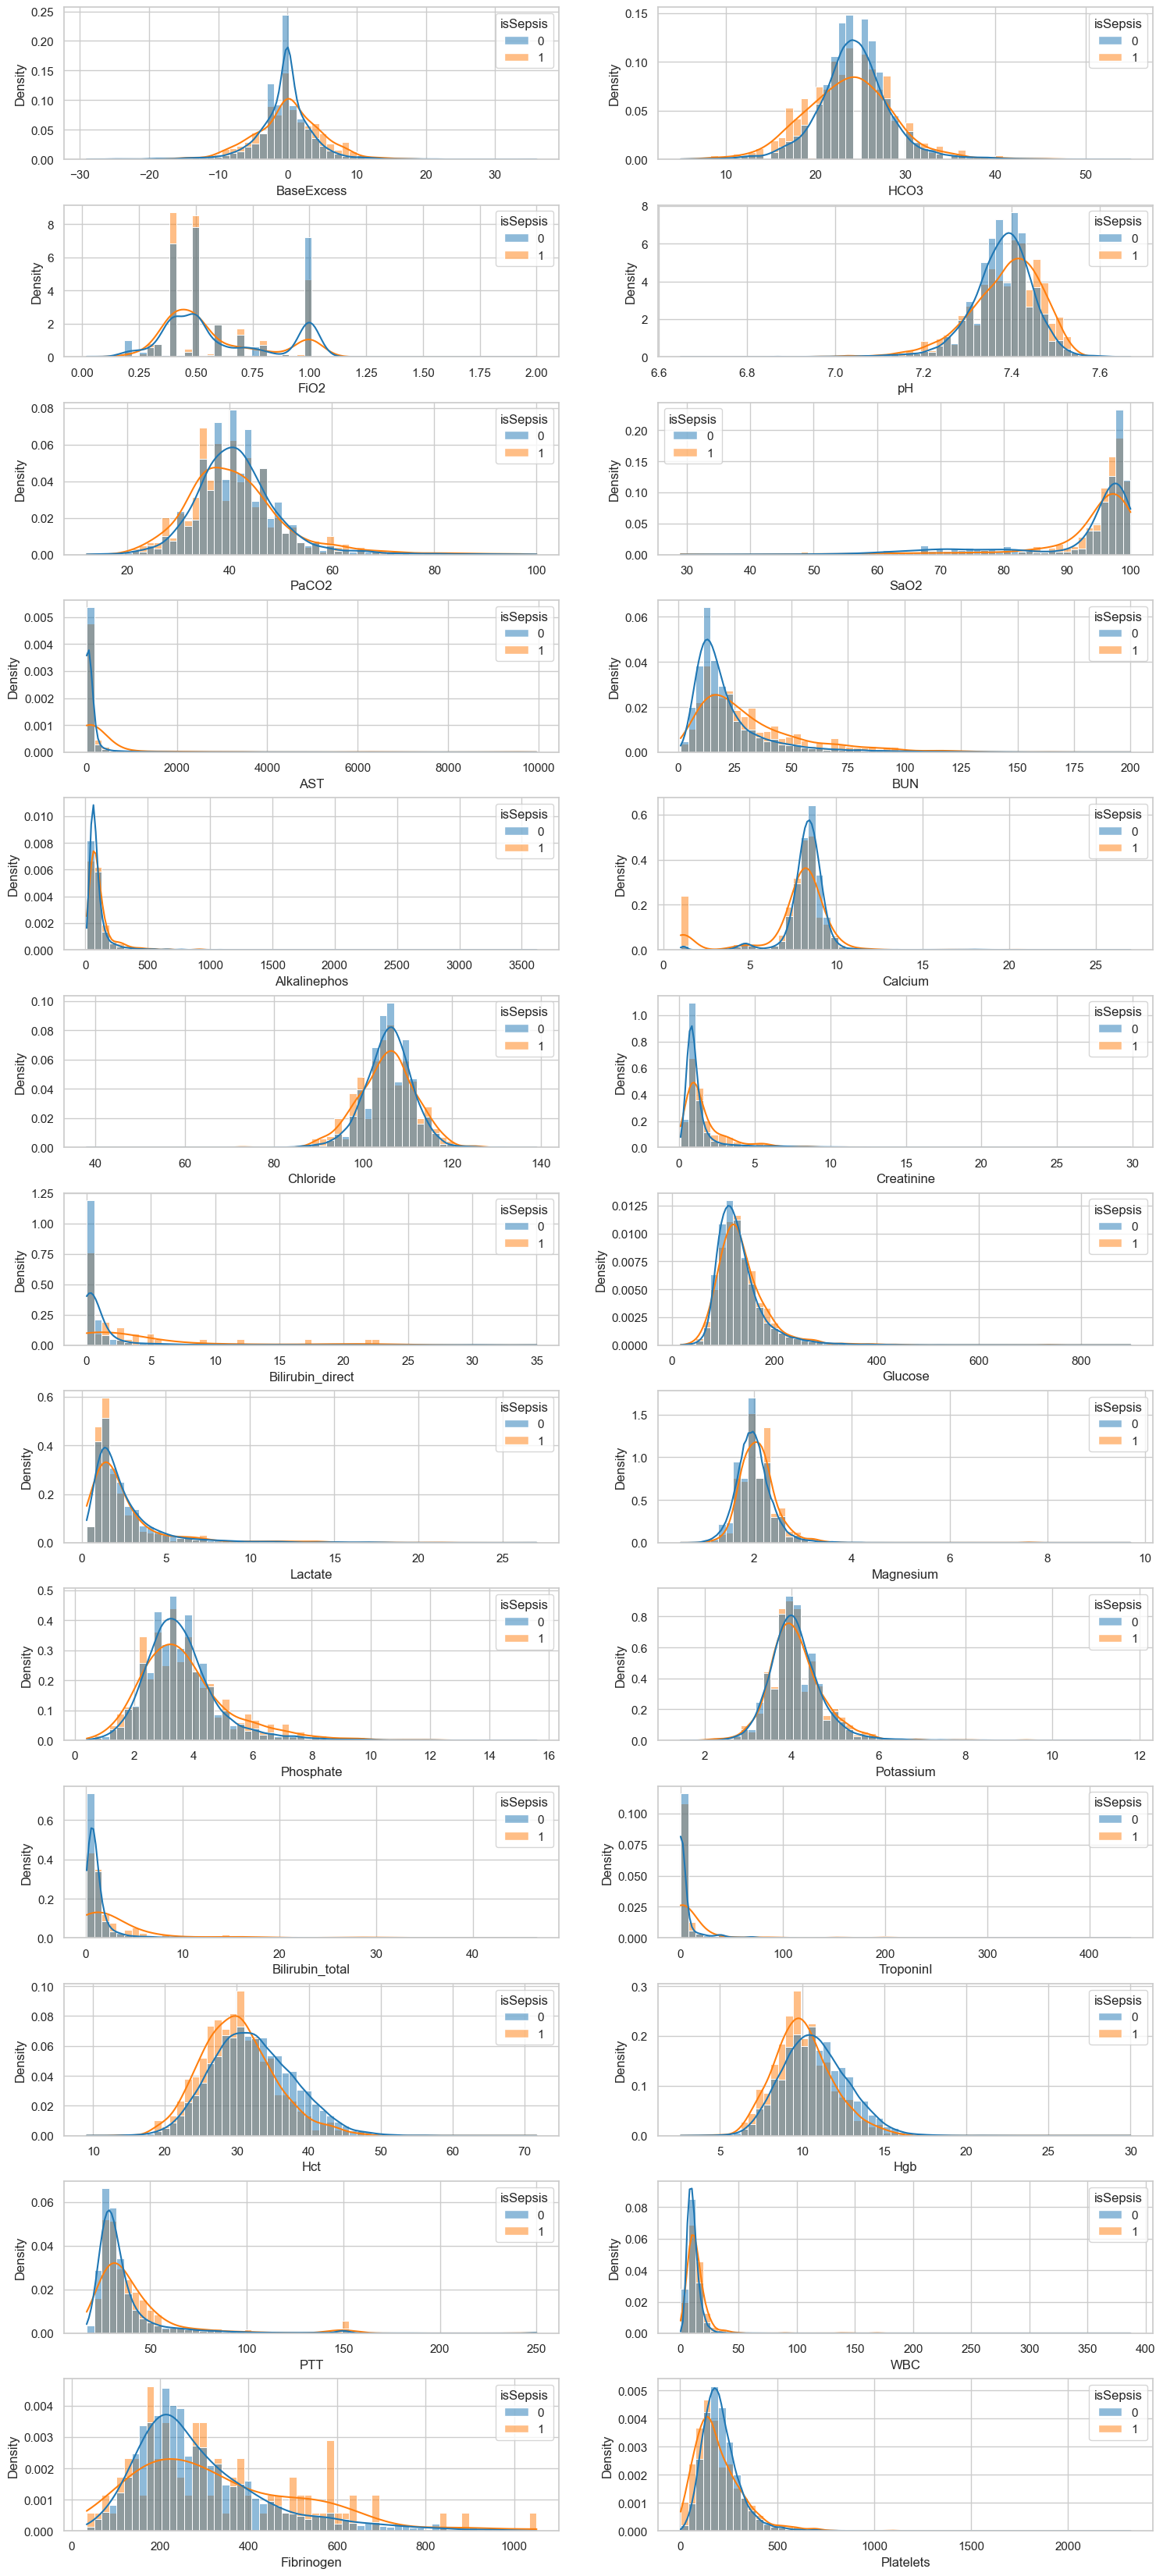

In [12]:
#X_train.columns

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_values, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("lab_values.png", dpi=400)

### Visualise **demographics:**

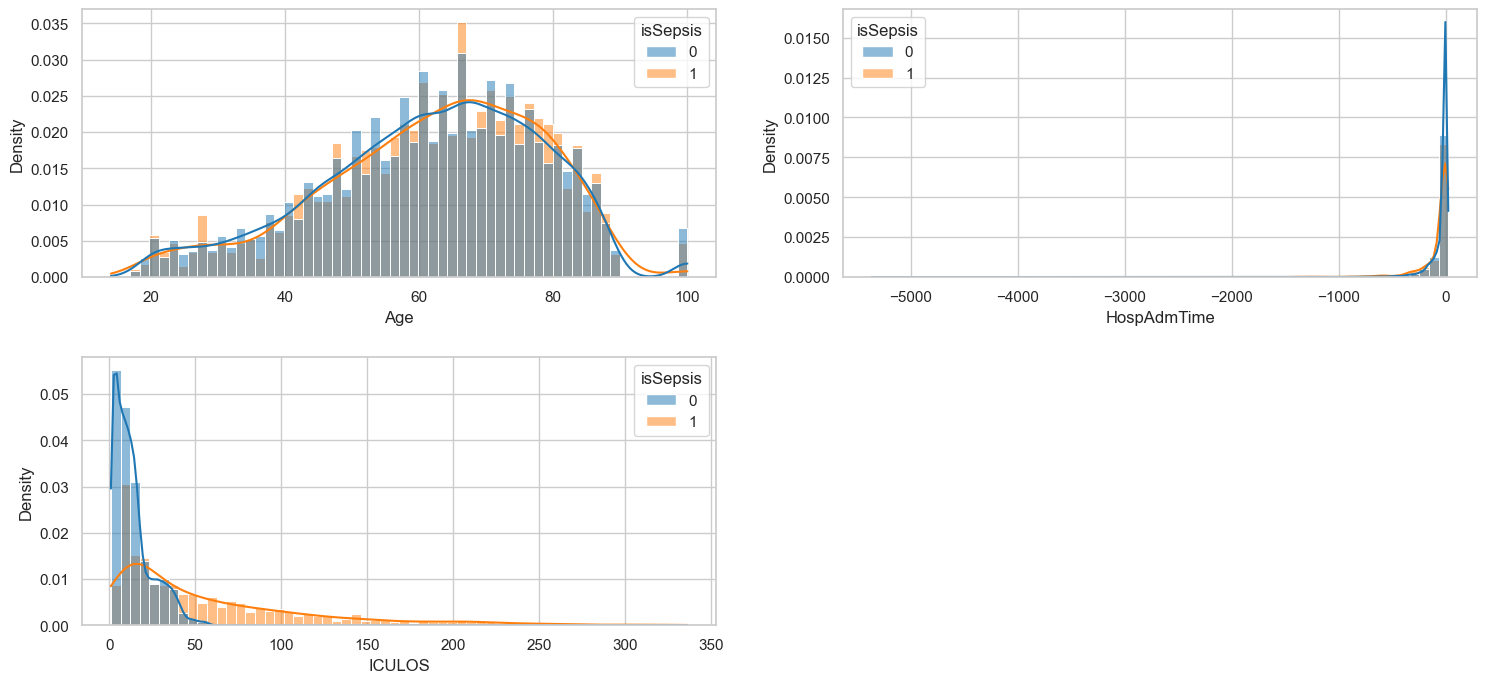

In [13]:
#X_train.columns

demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
#plt.savefig("demographics.png", dpi=400)

In [14]:
# plotGender(data): This function takes a gender-related dataset (data) as input and is designed to create a count plot to visualize the distribution of gender categories.
# It first assigns labels "female" and "male" based on the values in the data variable.
# Then, it uses sns.countplot to create a count plot, where x=gender represents the data to be plotted on the x-axis and hue=y_train implies that the plot should be further divided by y_train values (e.g., class labels). dodge=False means that bars for different categories will be stacked, and not dodged
def plotGender(data):
    gender = data
    gender[gender==0] = "female"
    gender[gender==1] = "male"
    
    sns.countplot(x=gender, hue=y_train, dodge=False)    

# plotUnit(data): This function is meant to visualize the distribution of patients in different units or types of units.
# It calculates the number of patients in "Unit1" and "Unit2" by counting the occurrences of 1 in these columns.
# It also counts the number of patients where both "Unit1" and "Unit2" are missing (NaN values).
# It then uses sns.barplot to create a bar plot with labels for different unit types and corresponding counts
def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])
    
    sns.barplot(x=["Medical ICU","Surgical ICU","Not Given"] ,y=[Unit1, Unit2, totalNa])

C:\Users\shant\AppData\Local\Temp\ipykernel_17464\1375138790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[gender==0] = "female"
C:\Users\shant\AppData\Local\Temp\ipykernel_17464\1375138790.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gender[gender==0] = "female"


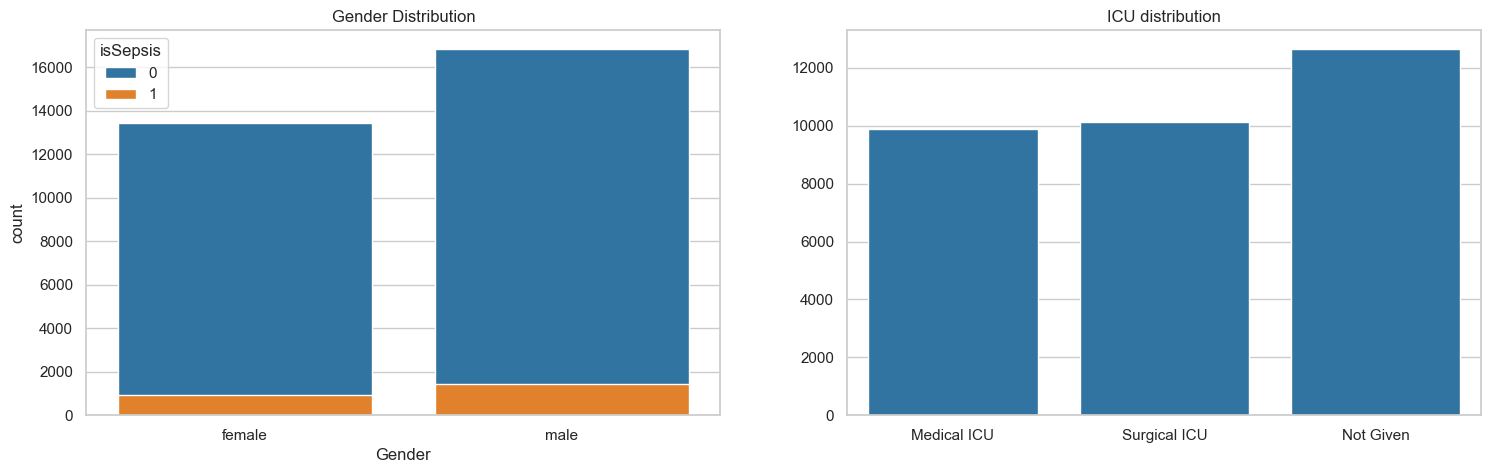

In [15]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plotGender(X_train["Gender"])   
plt.subplot(1,2,2)
plt.title("ICU distribution")
plotUnit(X_train)

#plt.savefig("additional.png", dpi=400)

### Observations
**Vital signs:**
+ **HR**, **Temp**, and **Resp** seem to differ between septic and non-septic patients
+ The rest of the attributes don't differ and may be irrelevant in terms of sepsis prediction <br>

**Laboratory values:**
+ Despite having similar mean, feature **BaseExcess** appears to deviate higher from the mean for septic patients, it is possible that abnormal concentration of excess bicarbonate is inherent to septic patients
+ **FiO2** is represented by somewhat discrete values with bimodal distribution. This and the fact that just about 20% of the patients have record of this value makes this features likely to be diregarded as non-representative
+ **pH** of septic patients appears to be higher (more basic pH)
+ **BUN** also appears to be higher in concentrations for sepsis-positive patients
+ **Calcium** concentration, although similar for septic and non-septic patients, has outliers for septic patients at very low concentrations. We may want to investigate this further
+ **Bilirubin_direct** looks to be higher for septic patients, but we have to keep in mind that more than 96% of the patients lack this attribute. Nontheless, it is possible though that bilirubin concentration was measured only if doctors suspected this attribute to be abnormal and we there are indeed some very high concentration for septic patients
+ **Bilirubin_total** is higher for septic patients as well. Worth noting, that total bilirubin concentration is defined as the sum of **Bilirubin_direct** and indirect bilirubin. Therefore we may expect this feature to be strongly correlated with **Bilirubin_direct** 
+ **Hct** and **Hgb** values seem to be slightly lower in concentrations for septic patients
+ Septic patients appear to have slightly higher **PTT** sometime
+ **Fibrinogen** of septic patient appears to be bimodal and slightly higher in concentration than that of non-septic patients. About 95% of patients miss this feature thus we might expect that fibrinogen was measured for some specific reason
+ Septic patients may have slightly lower concantrations of **Platelets**

**Demographics:**
+ No differnce in **Age** between septic and non-septic patients. It is unlikely that one or few years of diffence in age may lead to higher chance of developing sepsis. However, in many biochmical signs tend to change with age, therefore it may be benefitial to include age in our model but to divide it into some discrete, more representative values. A lot of age values are 100, which are for patients older than 90.
+ **HospAdmTime** is quite similar for all patients
+ Patients that stayed at ICU longer have had higher chances of eventually developing sepsis
+ Patients that didn't have a record of ICU unit were likely assigned to other ICU than SICU and MICU (e.g. Cardiac ICU, Trauma ICU etc.) as all the patients have a record of time spent in ICU (**ICULOS** attributte).

---

Let's see if the type of **ICU** that a patient is treated in is related to chances of developing a sepsis:

In [17]:
# CombineUnits(units_cols): This function takes a DataFrame units_cols as input, which presumably contains columns "Unit1" and "Unit2." 
# It combines these columns into a new column "Unit" based on certain conditions.
# It creates a copy of the input DataFrame to avoid modifying the original data.
# It initializes the "Unit" column with zeros.
# It assigns the value "MICU" to rows where "Unit1" is 1.
# It assigns the value "SICU" to rows where "Unit2" is 1.
# It assigns the value "Other ICU" to rows where both "Unit1" and "Unit2" are missing (NaN).
# It returns a DataFrame containing only the "Unit" column.
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


# ShareSepticByUnit(UnitCol, y): This function calculates the share of septic cases by unit type. 
# It takes two arguments: UnitCol is the result of the CombineUnits function, and y is the target variable.
# It initializes an empty dictionary shares to store the share of septic cases by unit type.
# It extracts subsets of the target variable y for each unit type ("MICU," "SICU," and "Other ICU").
# It calculates the share of septic cases for each unit type and stores the results in the shares dictionary as percentages.
def ShareSepticByUnit(UnitCol, y):
    shares = {}
    
    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]
    
    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100
        
    return shares


IsSeptic_shares = ShareSepticByUnit(CombineUnits(X_train.copy()), y_train)

C:\Users\shant\AppData\Local\Temp\ipykernel_17464\2373916235.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MICU' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data["Unit1"] == 1, "Unit"] = "MICU"


C:\Users\shant\AppData\Local\Temp\ipykernel_17464\2373916235.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MICU' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data["Unit1"] == 1, "Unit"] = "MICU"


<Axes: ylabel='Developed Sepsis (%)'>

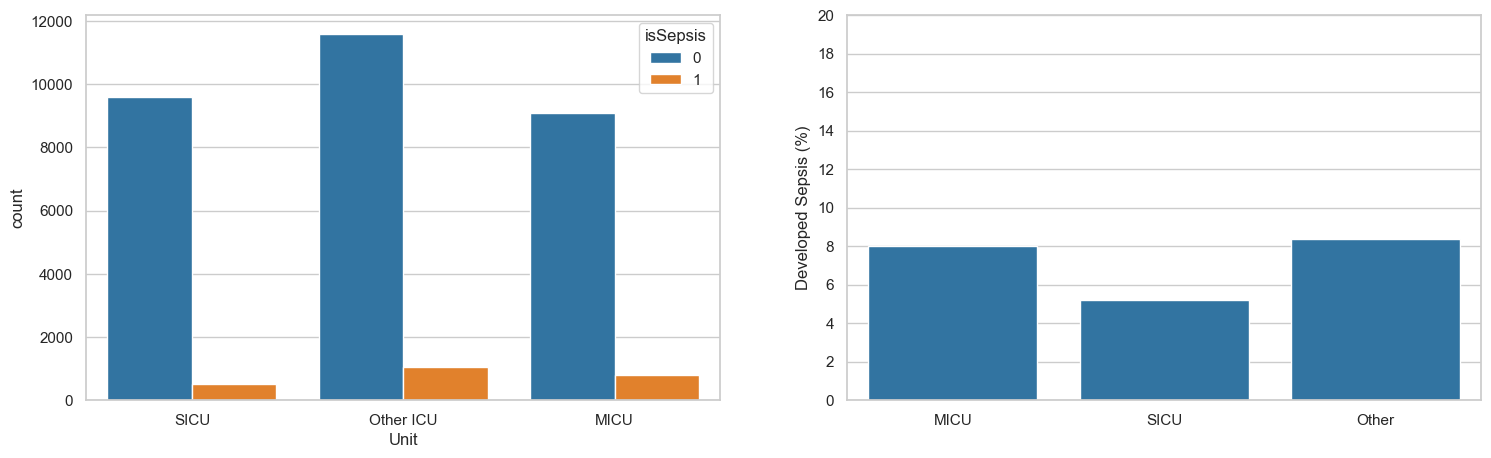

In [18]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(data=CombineUnits(X_train.copy()), x="Unit", hue=y_train) # creates a count plot
plt.subplot(1,2,2)
plt.ylim([0,20]) # sets the limits 
plt.ylabel("Developed Sepsis (%)")
plt.yticks([i for i in range(0,21,2)])
sns.barplot(x=list(IsSeptic_shares.keys()), y=list(IsSeptic_shares.values()))

#plt.savefig("add2.png", dpi=400)

Not by much, but patients treated in surgical ICU had lower probability of developing sepsis. This feature may be useful for our model.

---

### Preliminary feature exclusion <br>
Before we move any further with our analysis let's discuss if we want to disregard any features as irrelevant or non-representative (or both). 
+ **FiO2** (fraction of inspired oxygen) is missing for 82 % of the patients from the test set. The distribution of this feature also looks very unusual, perhaps indicating that this sample is quite non-representative. 
+ **EtCO2** (end tidal carbon dioxide) lacks for more than 95 % of the patients. This feature does not change between septic and non-septic patients and although there might be a specific reasong to measure this parameter is appear to be non-related to sepsis occurence. 
+ **SaO2** is similar case to **EtCO2** - lots of missing values and no apparent difference between septic and non-septic patients, we will drop this feature. 
+ **HospAdmTime** (hours between hospital admit and ICU admit) does not differ between positive and negative patients. Overall, most of the patients are delivered to ICU as soon as they develop a critical condition and it's probably irrelevant how long they have been present in a hospital in stable condition.
+ **TroponinI** is missing in most cases (>95%) and is reported to indicate heart and kidney failure, thus we may exclude thus feature

Now that we excluded some features let's take a look if any numerical features correlate to each other:

<Axes: >

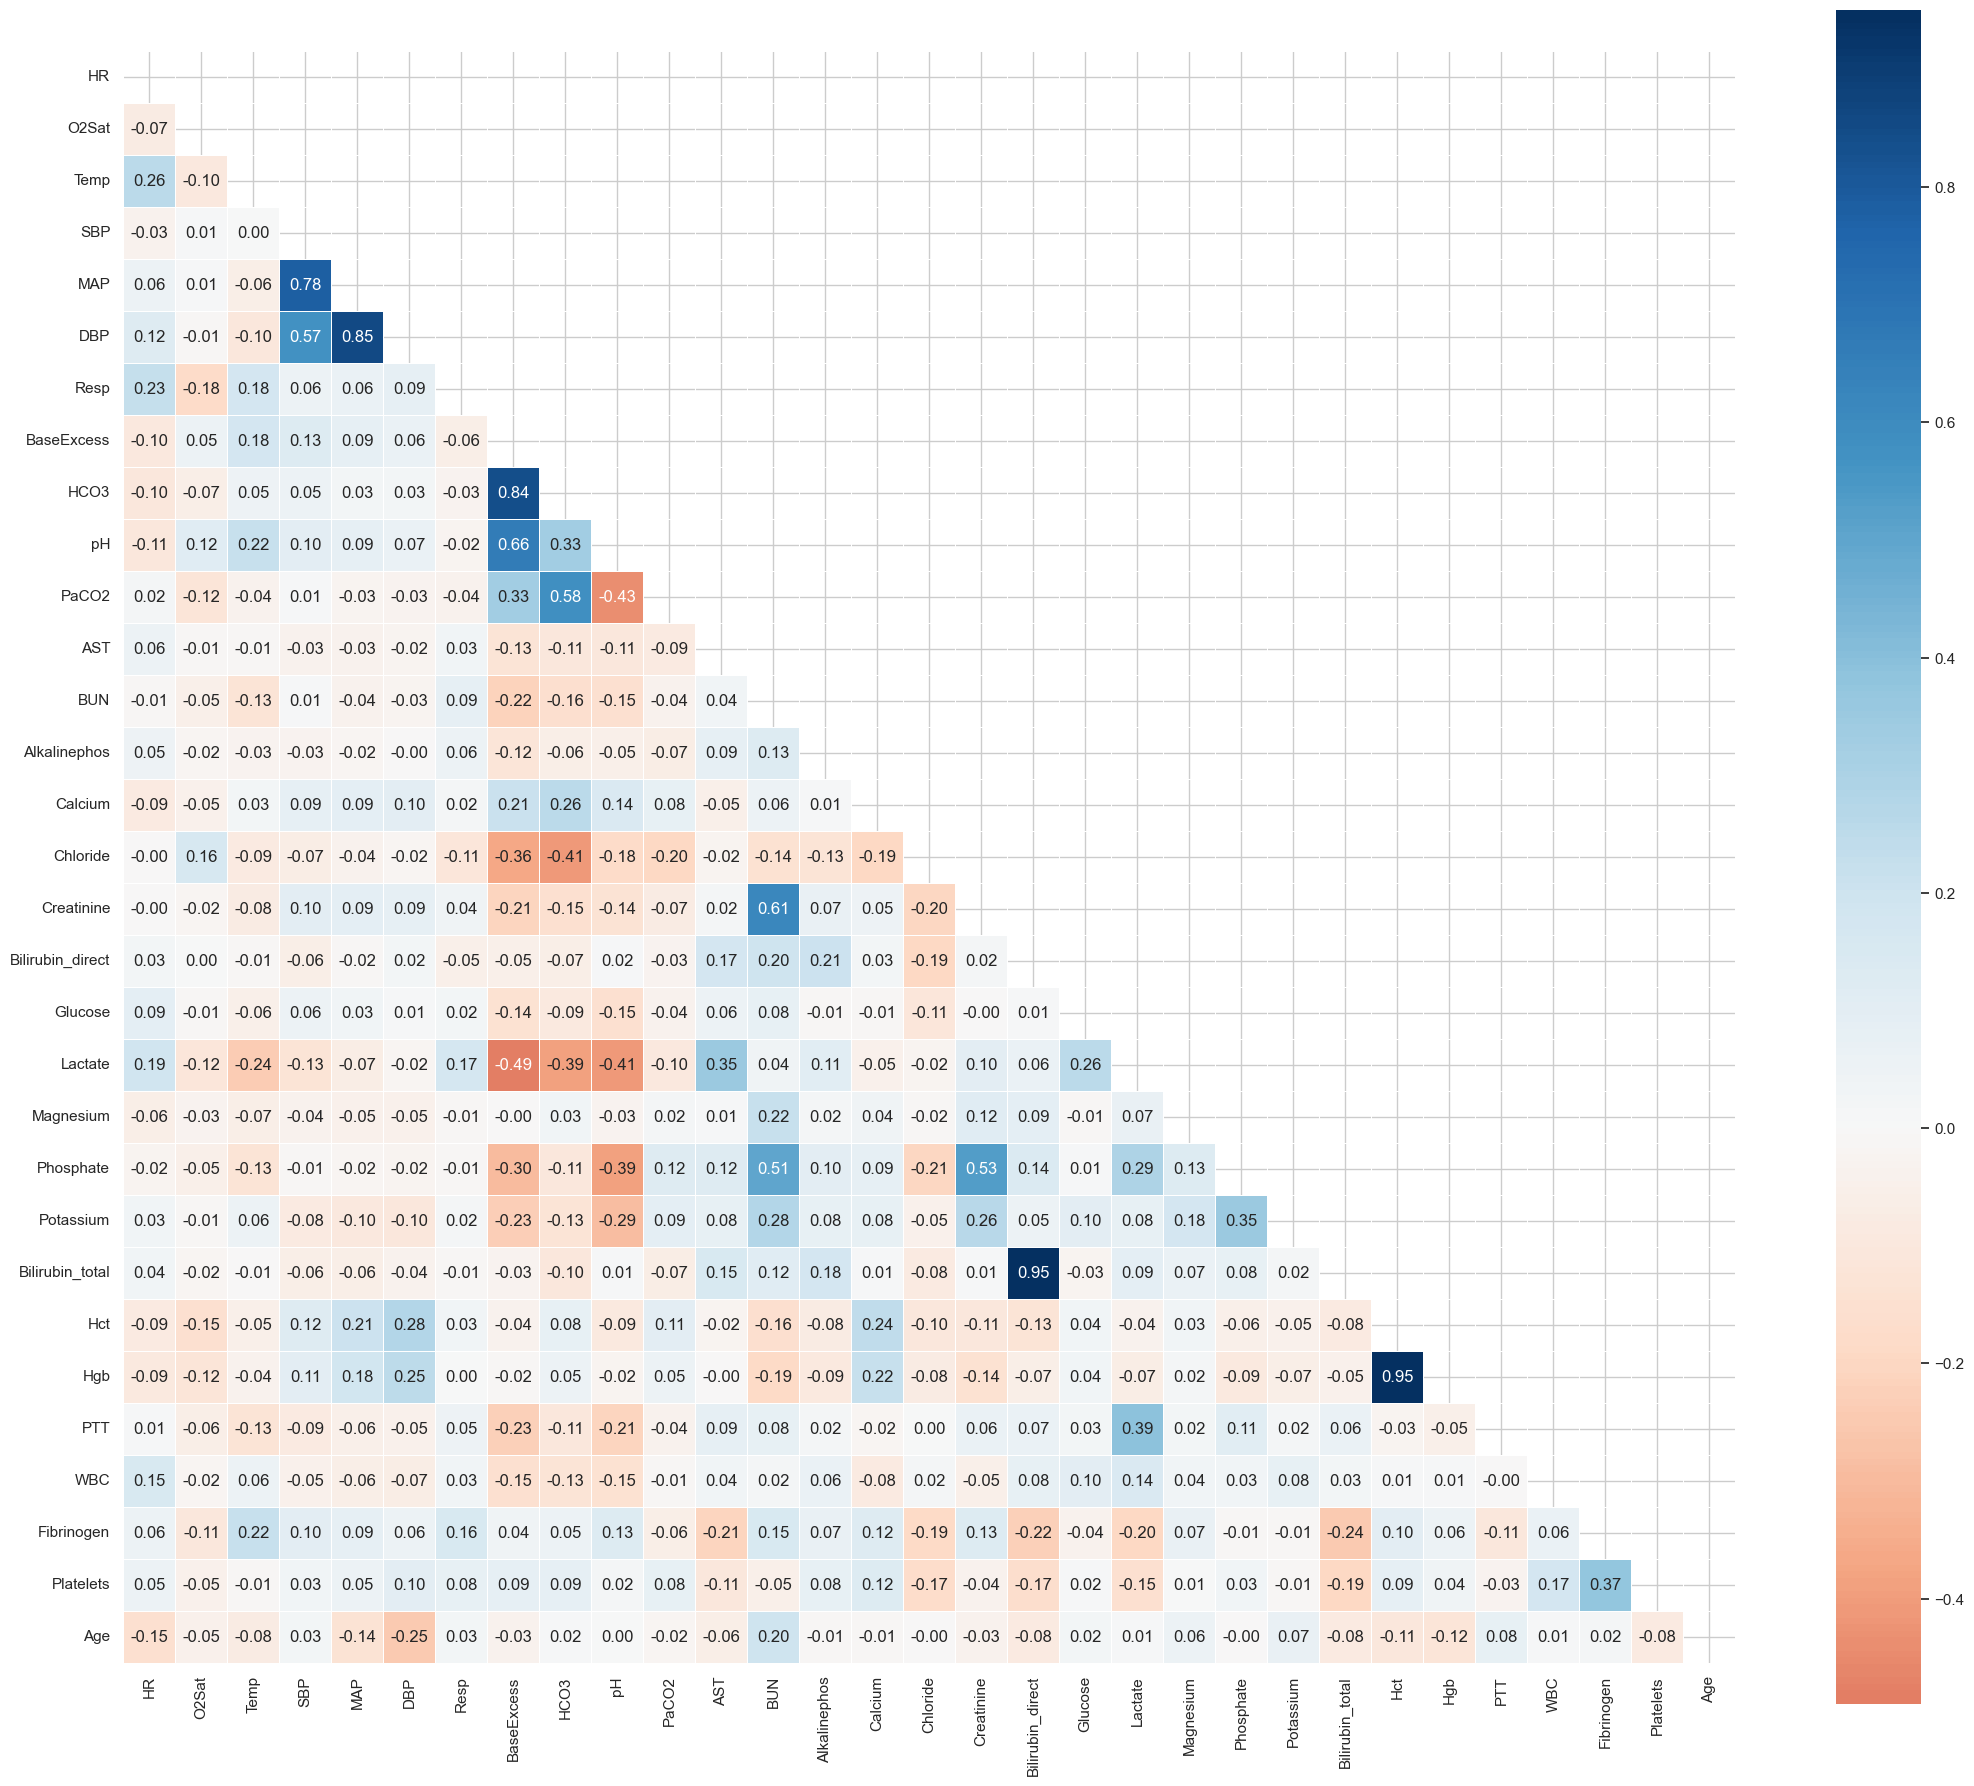

In [19]:
#X_train.columns
# define a list of feature names to include in the correlation analysis  
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

#  calculates the correlation matrix for the selected features by extracting them from the X_train dataset and using the .corr() function. The resulting mat_corr DataFrame contains the correlation coefficients between the features
mat_corr = X_train[correlation_features].corr()

# it create a mask that is the same shape as the `mat_corr` DataFrame, filled with zeros
mask = np.zeros_like(mat_corr)

# sets the upper triangle of the mask to True, which will be used to hide the upper part of the heatmap, as it's symmetric and redundant
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,22))

#  creates the heatmap using Seaborn's heatmap function. It uses the correlation matrix mat_corr as data, the mask to hide the upper triangle, and several formatting options to annotate the heatmap cells with correlation coefficients.
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

#plt.savefig("cormat.png", dpi=400)

In [20]:
# sorting the correlation values between the "Bilirubin_total" feature and other features in descending order and then selecting the top 3 features with the highest positive correlation
mat_corr["Bilirubin_total"].sort_values(ascending=False)[:3]

Bilirubin_total     1.000000
Bilirubin_direct    0.949029
Alkalinephos        0.178028
Name: Bilirubin_total, dtype: float64

In [21]:
#  sorting the correlation values between the "DBP" feature (Diastolic Blood Pressure) and other features in descending order and then selecting the top 3 features with the highest positive correlation
mat_corr["DBP"].sort_values(ascending=False)[:3]

DBP    1.000000
MAP    0.852862
SBP    0.570960
Name: DBP, dtype: float64

In [22]:
#  sorting the correlation values between the "SBP" feature (Systolic Blood Pressure) and other features in descending order and then selecting the top 3 features with the highest positive correlation
mat_corr["SBP"].sort_values(ascending=False)[:3]

SBP    1.000000
MAP    0.779998
DBP    0.570960
Name: SBP, dtype: float64

In [23]:
mat_corr["HCO3"].sort_values(ascending=False)[:4]

HCO3          1.000000
BaseExcess    0.840452
PaCO2         0.584750
pH            0.326729
Name: HCO3, dtype: float64

In [24]:
mat_corr["pH"].sort_values(ascending=False)[:4]

pH            1.000000
BaseExcess    0.662243
HCO3          0.326729
Temp          0.215224
Name: pH, dtype: float64

In [25]:
mat_corr["PaCO2"].sort_values(ascending=False)[:4]

PaCO2         1.000000
HCO3          0.584750
BaseExcess    0.332045
Phosphate     0.119146
Name: PaCO2, dtype: float64

In [26]:
mat_corr["Hgb"].sort_values(ascending=False)[:3]

Hgb    1.000000
Hct    0.950894
DBP    0.252229
Name: Hgb, dtype: float64

+ Unsurprisingly a high correclation between **Bilirubin_direct** and **Bilirubin_total**. **Bilirubin_direct** is missing for about 96 % of patients, having another feature that highly correlates to this one enables us to exclude **Bilirubin_direct** from classification model. 
+ There is a high correlation between **DBP** (diastolic BP), **MAP** (mean arterial pressure), and **SBP** (systolic BP). Mean arterial pressure is known ([source](https://doi.org/10.1007/s00134-009-1427-2)) to be primary indicator of patient state in near septic conditions, thus, both **DBP** and **SBP** may be disregarded as **MAP** is calculated from these two features. 
+ We can notice correlation between three features - **pH**, **HCO<sub>3</sub>**, and **PaCO<sub>2</sub>**. Despite being correlated the ratio between these three features may tell us whether the patient is undergoing *acidosis* or *alkalosis* and which one it is *metabolic* or *respiratory*. Thus, it's better to leave these features and maybe combine them into some categorical feature that will state what type of acidosis/alkalosis has been developed. 
+ Lastly, hemoglobin (**Hgb**) and hematocrit (**Hct**) values happened to be highly correlated. This is to no surprise because whilst hemoglobin expresses concentration of hemoglobin in blood, hematocrit is a volume share of erytrocytes in blood. Research articles about sepsis diagnosis mostly concentrate on hemoglobin out of these two, while hematocrit is often used to asses anemia and other diseases. Let's stick with experts and leave just **Hgb**.

---

Now, let's perform a chi square test. This test will show us what features are independant with the target label.

**Performing a chi-squared(chi2) test for feature selection**

It is useful for feature selection, it helps identify the statistical significance of each feature's relationship with the target variable. You can assess which features have a stronger association with the target variable based on their chi-squared statistics and p-values

In [28]:
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

X_train.columns
chi_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'ICULOS']

X_chi = X_train[chi_cols].copy()

# SimpleImputer to handle any missing values in the selected features. The "median" strategy is used to fill missing values with the median of each column
imputer = SimpleImputer(strategy="median")
X_chi[chi_cols] = imputer.fit_transform(X_chi)

#  This computes chi-squared statistics and p-values for the relationship between each selected feature and the target variable y_train.
chis = chi2(X_chi, y_train)

len(chi_cols)
chis[0].reshape(len(chi_cols),1)

#  create dictionaries chi_dict and p_dict to store the chi-squared statistics and p-values for each feature.
chi_dict = {}
p_dict = {}
for i in range(len(chi_cols)):
    chi_dict[chi_cols[i]] = chis[0][i]
    p_dict[chi_cols[i]] = chis[1][i]

In [29]:
p_dict

{'HR': 0.0,
 'O2Sat': 0.011466464410290813,
 'Temp': 0.03223701638262886,
 'SBP': 2.9803751100057315e-25,
 'MAP': 1.943923389153721e-50,
 'DBP': 1.7239655253783458e-30,
 'Resp': 1.4061071699425064e-156,
 'EtCO2': 0.6326907129777226,
 'HCO3': 0.028627967697710942,
 'FiO2': 0.6456660605949284,
 'pH': 0.9802113995781832,
 'PaCO2': 0.9969658531745816,
 'SaO2': 0.8167134956577965,
 'AST': 0.0,
 'BUN': 2.158050738583087e-09,
 'Alkalinephos': 6.246303825565965e-51,
 'Calcium': 8.107272325849995e-06,
 'Chloride': 0.8103980974474069,
 'Creatinine': 9.458535259787405e-10,
 'Bilirubin_direct': 0.05918190416088102,
 'Glucose': 6.91561507171923e-06,
 'Lactate': 0.09641090268873044,
 'Magnesium': 0.2601644742509466,
 'Phosphate': 0.5991432565099473,
 'Potassium': 0.41284405383562384,
 'Bilirubin_total': 5.659744558705351e-24,
 'TroponinI': 8.815086388058337e-69,
 'Hct': 2.3991278504750208e-18,
 'Hgb': 6.4893438734460425e-06,
 'PTT': 0.006919940866317319,
 'WBC': 3.1779652241731986e-08,
 'Fibrinogen'

P-values represent probability of a null-hypothesis applicability to a given feature. In this case the null-hypothesis is that a feature and target label are dependant values. For feature selection we will use the most common p-value threshold - 95 %. Thus, all features with p-value higher than 0.05 violate null-hypothesis and may be disregarded. These features are: <br>
**EtCO2**<br>
**FiO2**<br>
**SaO2**<br>
**Chloride**<br>
**Bilirubin_direct**<br>
**Lactate**<br>
**Magnesium**<br>
**Phosphate**<br>
**Potassium**<br>
Other than that we can see that **pH** and **PaCO2** violate null-hypothesis. We mentioned that these features may predict acid-base disturbances in patients. However, since we have **BaseExcess** feature **pH** becomes rudimentary, however we can still use **PaCO2** to find out wheter a patient has metabolic or respiratory disturbance. Specifically, septic patients often develop a condition known as *Respiratory alkalosis with metabolic acidosis*.

---

Let's examine some outliers. We know that patients above 90 y.o are marked as 100 y.o. This may be misleading; we may expect a difference in metabolic and immune processes between 90 y.o. and say 110 y.o. Therefore we will exclude patients older than 90 later in [feature engineering.](#FE) Other outliers were observed in **Calcium** and **PTT** features, let's check them:

In [30]:
# X_train["Calcium"] < 2: This creates a Boolean mask that checks if the value in the "Calcium" column is less than 2. The result is a Boolean Series.
# X_train[...]: This uses the Boolean mask to filter the X_train DataFrame, selecting only the rows where the condition is true (i.e., where "Calcium" is less than 2).
# .head(): This method is used to display the first 5 rows of the filtered DataFrame.
# .T: Finally, .T is used to transpose the DataFrame, which swaps the rows and columns, making it easier to view the data
X_train[X_train["Calcium"] < 2].head().T

,25603,21370,26148,21928,25588
HR,96.0,58.0,90.0,81.0,89.0
O2Sat,85.0,100.0,99.5,100.0,99.5
Temp,NaN,NaN,36.6,36.55,37.0
SBP,140.0,111.0,118.0,150.0,156.0
MAP,66.0,95.0,85.0,103.0,94.0
DBP,48.0,83.0,68.5,71.0,67.0
Resp,31.0,16.0,NaN,19.0,24.0
EtCO2,NaN,NaN,NaN,NaN,42.0
BaseExcess,NaN,NaN,NaN,NaN,NaN
HCO3,NaN,NaN,NaN,NaN,NaN


In [31]:
# Count of how many values in the "Calcium" column of X_train are less than 
X_train["Calcium"][X_train["Calcium"] < 2].count()

269

In [32]:
X_train[X_train["PTT"] > 150].head().T

,19147,30817,25485,30199,24498
HR,87.0,85.0,67.0,83.0,86.0
O2Sat,100.0,96.5,97.0,94.0,100.0
Temp,33.9,NaN,NaN,34.4,36.5
SBP,92.0,141.5,105.0,129.0,178.0
MAP,82.0,102.0,76.0,104.0,107.0
DBP,76.0,76.5,67.0,95.0,39.0
Resp,25.0,18.5,NaN,27.5,16.0
EtCO2,24.5,NaN,NaN,NaN,NaN
BaseExcess,NaN,NaN,NaN,NaN,NaN
HCO3,NaN,NaN,NaN,NaN,NaN


In [33]:
X_train["Calcium"][X_train["PTT"] > 150].count()

38

Cursory examining don't lead to any substantial finding. The only observation worth noting is rather low temperatures recorded from patients with high **PTT**. We will not remove these observations for now.

---

<a id="FE"></a>
# 2. Feature Engineering

Now it's time to engineer our features. First, let's make a list of features that are left after **EDA**. Expand the list below if you want to see the features, there are still quite a lot of them.

**Vital signs (columns 1-8)** <br>
HR - Heart rate (beats per minute); <br>
O2Sat - Pulse oximetry (%); <br>
Temp - Temperature (Deg C)<br>
MAP - Mean arterial pressure (mm Hg)<br>
Resp - Respiration rate (breaths per minute)<br>
**Laboratory values (columns 9-34)**<br>
BaseExcess - Measure of excess bicarbonate (mmol/L)<br>
HCO3 - Bicarbonate (mmol/L)<br>
pH - N/A<br>
PaCO2 - Partial pressure of carbon dioxide from arterial blood (mm Hg)<br>
SaO2 - Oxygen saturation from arterial blood (%)<br>
AST - Aspartate transaminase (IU/L)<br>
BUN - Blood urea nitrogen (mg/dL)<br>
Alkalinephos - Alkaline phosphatase (IU/L)<br>
Calcium - (mg/dL)<br>
Chloride - (mmol/L)<br>
Creatinine - (mg/dL)<br>
Glucose - Serum glucose (mg/dL)<br>
Lactate - Lactic acid (mg/dL)<br>
Magnesium - (mmol/dL)<br>
Phosphate - (mg/dL)<br>
Potassium - (mmol/L)<br>
Bilirubin_total - Total bilirubin (mg/dL)<br>
Hgb - Hemoglobin (g/dL)<br>
PTT - partial thromboplastin time (seconds)<br>
WBC - Leukocyte count (count*10^3/µL)<br>
Fibrinogen - (mg/dL)<br>
Platelets - (count*10^3/µL)<br><br>
**Demographics (columns 35-40)**<br>
Age - Years (100 for patients 90 or above)<br>
Gender - Female (0) or Male (1)<br>
Unit - Administrative identifier for ICU unit<br>
ICULOS - ICU length-of-stay (hours since ICU admit)<br><br>

---

### Age

Let's begin with the most obvious - **Age**. It's unlikely that a difference in one or few years will result in significantly different metabolic processes, immune responses and overall fitness. Nonetheless, we may expect a teen and a senior to have different metabolism. Thus, let's divide age into categories:

In [34]:
# remove outliers based on 'age' feature, where the 'Age ' is greater than 90 
y_train = y_train.loc[X_train["Age"] <= 90]
X_train = X_train.loc[X_train["Age"] <= 90]

y_test = y_test.loc[X_test["Age"] <= 90]
X_test = X_test.loc[X_test["Age"] <= 90]

In [35]:
def discretizateAge(data):
    # teen, youth, adult, senior
    bins = [13, 18, 30, 60, np.inf]

    # 'digitize()' function is used to discretize the data based on the specified bins
    data = np.digitize(data, bins=bins)

    # Reshapes the resulting array to have a single column (1D) while keeping the number of rows the same.
    data = data.reshape(len(data), 1)
    return data

# This transformer is used to apply the age discretization to the "Age" feature in a dataset.
DiscretizateAge = FunctionTransformer(discretizateAge) 

# .fit_transform() method applies the transformation to the "Age" feature, resulting in a discretized version of the "Age" feature with category labels. The shape of this transformed array is obtained using .shape.
DiscretizateAge.fit_transform(X_train["Age"]).shape

(32360, 1)

In [36]:
age_pipeline = Pipeline([
    #  ("imputer"): It uses the SimpleImputer with the strategy "median" to impute missing values in the "Age" featur
    ("imputer", SimpleImputer(strategy="median")),
    ("discretizator", DiscretizateAge)
])

age_pipeline.fit_transform(X_train[["Age"]]).shape

(32360, 1)

In [37]:
CombineAllUnits = FunctionTransformer(CombineUnits)

units = ["Unit1", "Unit2"]

units_pipeline = Pipeline([
    ("combine", CombineAllUnits),
    ("encoder", OneHotEncoder(sparse=False))
])

units_pipeline.fit_transform(X_train[units]).shape

C:\Users\shant\AppData\Local\Temp\ipykernel_17464\2373916235.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MICU' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
c:\Users\shant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(32360, 3)

In [38]:
acidbase_features = ["BaseExcess", "PaCO2"]

def isAcidBaseDisturb(cols):
    cols = np.c_[cols, np.zeros(len(cols))]
    cols[:,2][(cols[:,0] < -2) & (cols[:,1] < 40)] = 1
    col = cols[:,2].reshape(len(cols), 1)
    return col

FindAcidosis = FunctionTransformer(isAcidBaseDisturb)
FindAcidosis.fit_transform(X_train[acidbase_features])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [39]:
acidbase_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("acidosis", FindAcidosis)
])

acidbase_pipeline.fit_transform(X_train[acidbase_features]).shape

(32360, 1)

In [40]:
num_features = ["HR", "O2Sat", "Temp", "MAP", "Resp", "AST", "BUN",
                "Alkalinephos", "Calcium", "Creatinine", "Glucose", "Bilirubin_total", 
                "Hgb", "PTT", "WBC", "Fibrinogen", "Platelets", "ICULOS"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_pipeline.fit_transform(X_train[num_features]).shape

(32360, 18)

In [41]:
gender_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

gender_pipeline.fit_transform(X_train[["Gender"]])

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [42]:
preprocessing_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ("acidbase", acidbase_pipeline, acidbase_features),
    ("age", age_pipeline, ["Age"]),
    ("units", units_pipeline, units),
    ("gender", gender_pipeline, ["Gender"])
], verbose=True)

preprocessing_pipeline.fit_transform(X_train).shape

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.2s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s


C:\Users\shant\AppData\Local\Temp\ipykernel_17464\2373916235.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MICU' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
c:\Users\shant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(32360, 24)

---

<a id="MS"></a>
# 3. Model Selection

Before we train our model we have to select an appropriate metric. If we recall that just 7% of all patients in our dataset had sepsis we should give a higher value to false negatives (penalizing our model for predicting all 0s), thus a good metric would be *f1 score* :), which is defined as:<br>

$$ f_{1} = 2 \cdot \frac{recall \cdot precision}{recall + precision} $$

In [43]:
# applies the preprocessing_pipeline to training dataset X_train. It fits the preprocessing steps (imputation, discretization, etc.) to the training data and then transforms it.
X_train = preprocessing_pipeline.fit_transform(X_train)

X_test = preprocessing_pipeline.fit_transform(X_test)

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.2s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s
[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.0s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s


C:\Users\shant\AppData\Local\Temp\ipykernel_17464\2373916235.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MICU' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
c:\Users\shant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shant\AppData\Local\Temp\ipykernel_17464\2373916235.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MICU' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
c:\Users\shant\AppData\Local\Programs\Pyt

**Logistic Regression**

`logreg = LogisticRegression(verbose=1):` This line creates an instance of the logistic regression model with the "verbose" parameter set to 1, which will display information about the training process.

`logreg.fit(X_train, y_train):` You fit the logistic regression model to the training data. The model is trained on X_train (your preprocessed training data) and the corresponding target labels y_train.

`cv_logreg = cross_validate(logreg, X_train, y_train, cv=3, scoring="recall", return_train_score=True):` This line performs cross-validation using the cross_validate function. It evaluates the logistic regression model with 3-fold cross-validation on the training data. The "recall" metric is used as the scoring criterion, and return_train_score=True indicates that it should return scores on the training data as well.

The output of `cv_logreg` will contain various metrics for each fold of cross-validation, including training and testing recall scores.

The recall metric (or true positive rate) measures the model's ability to correctly identify positive instances. It's an important metric, especially in cases where false negatives should be minimized (e.g., in medical diagnoses where missing a positive case can be critical).

The results in `cv_logreg` will help you assess how well the logistic regression model is performing in terms of recall across different folds of the cross-validation.

In [44]:
logreg = LogisticRegression(verbose=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_validate(logreg, X_train, y_train, cv=3, scoring="recall", return_train_score=True)
cv_logreg

{'fit_time': array([0.15540504, 0.13256001, 0.15414286]),
 'score_time': array([0.00973821, 0.01066923, 0.00726366]),
 'test_score': array([0.33502538, 0.35532995, 0.35406091]),
 'train_score': array([0.34961929, 0.3534264 , 0.35088832])}

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
cv_knn = cross_validate(knn, X_train, y_train, cv=3, scoring="recall", return_train_score=True)
cv_knn

{'fit_time': array([0.00831318, 0.00967741, 0.00384378]),
 'score_time': array([0.86862183, 0.46426916, 0.47939134]),
 'test_score': array([0.32614213, 0.32741117, 0.30964467]),
 'train_score': array([0.31662437, 0.32170051, 0.33185279])}

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40, verbose=1)
cv_rf = cross_validate(rf, X_train, y_train, cv=3, scoring="recall", return_train_score=True)
cv_rf

{'fit_time': array([3.18836761, 3.08571696, 3.05356979]),
 'score_time': array([0.10195684, 0.09766006, 0.1024735 ]),
 'test_score': array([0.66116751, 0.64974619, 0.63705584]),
 'train_score': array([0.9930203 , 0.99238579, 0.99365482])}

**XGBoost Classifier**

`from xgboost import XGBClassifier:` You import the XGBoost classifier from the XGBoost library.

`xgboost = XGBClassifier(n_estimators=30, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1):` You create an instance of the XGBoost classifier with the following parameters:

`n_estimators:` The number of boosting rounds (trees) set to 30.
use_label_encoder=False: This parameter is set to False to suppress any warnings related to label encoding.

`scale_pos_weight=12:` It's common to adjust the class imbalance using the scale_pos_weight parameter by setting it to the ratio of negative class examples to positive class examples. A higher value, like 12 in this case, gives more weight to the positive class.

`eval_metric="aucpr":` You set the evaluation metric to "aucpr," which is the area under the precision-recall curve. This is a common metric for imbalanced classification tasks.

`verbosity=1:` This sets the verbosity to 1, which means we will get information about the training process.

`disable_default_eval_metric=1:` Disable the default evaluation metric.

`cv_xgboost = cross_validate(xgboost, X_train, y_train, cv=3, scoring="recall", return_train_score=True, verbose=1):` Performs cross-validation using the XGBoost classifier with 3-fold cross-validation on the training data. 

The `"recall"` metric is used as the scoring criterion, and `return_train_score=True` indicates that it should return scores on the training data as well. The `verbose=1` option is set to receive verbose information during the cross-validation process.

The output of `cv_xgboost` will contain various metrics for each fold of cross-validation, including training and testing recall scores. You can use this information to assess the performance of the XGBoost model in terms of recall across different folds of cross-validation.

In [47]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators=30, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
cv_xgboost = cross_validate(xgboost, X_train, y_train, cv=3, scoring="recall", return_train_score=True, verbose=1)
cv_xgboost

{'fit_time': array([23.31493759,  1.21205759,  1.26506805]),
 'score_time': array([0.03046155, 0.03508925, 0.02666402]),
 'test_score': array([0.82106599, 0.8071066 , 0.79949239]),
 'train_score': array([0.81345178, 0.80774112, 0.81725888])}

In [48]:
nn = MLPClassifier(max_iter=5000, hidden_layer_sizes=(50,30,15,5), verbose=1, learning_rate="adaptive")
cv_nn = cross_validate(nn, X_train, y_train, cv=3, scoring="recall", return_train_score=True, verbose=1)
cv_nn

Iteration 1, loss = 0.25042384
Iteration 2, loss = 0.17822415
Iteration 3, loss = 0.16620429
Iteration 4, loss = 0.15822053
Iteration 5, loss = 0.15235418
Iteration 6, loss = 0.14668667
Iteration 7, loss = 0.14369673
Iteration 8, loss = 0.13906475
Iteration 9, loss = 0.13488596
Iteration 10, loss = 0.13206614
Iteration 11, loss = 0.12887775
Iteration 12, loss = 0.12622826
Iteration 13, loss = 0.12297672
Iteration 14, loss = 0.12114227
Iteration 15, loss = 0.11813885
Iteration 16, loss = 0.11729059
Iteration 17, loss = 0.11553146
Iteration 18, loss = 0.11352042
Iteration 19, loss = 0.11167421
Iteration 20, loss = 0.11041364
Iteration 21, loss = 0.10994695
Iteration 22, loss = 0.10768683
Iteration 23, loss = 0.10593789
Iteration 24, loss = 0.10397605
Iteration 25, loss = 0.10223107
Iteration 26, loss = 0.10234877
Iteration 27, loss = 0.10027625
Iteration 28, loss = 0.09981971
Iteration 29, loss = 0.09822086
Iteration 30, loss = 0.09665190
Iteration 31, loss = 0.09472375
Iteration 32, los

{'fit_time': array([50.80273724, 51.11226296, 64.19386077]),
 'score_time': array([0.01710939, 0.02091432, 0.01606512]),
 'test_score': array([0.60532995, 0.55837563, 0.59771574]),
 'train_score': array([0.90545685, 0.83756345, 0.88071066])}

It's evident that a simple logistic regression unit and k-means clustering underfit the data, while both ensemble models and neural network overfit.

<a id="FTSM"></a>
# 4. Tunning model's hyperparameters

In [49]:
params = {"n_estimators": [25,30,35],"max_delta_step": [0.01,0.1,1], "subsample": [0.1, 0.5, 1], "reg_lambda": [0.1, 1, 1.1], "alpha": [0, 0.1, 1], "max_depth": [1,5,10]}

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

In [52]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(estimator=xgboost, param_grid=params, verbose=2, scoring="recall", cv=2)
grid_search = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 729 candidates, totalling 1458 fits
[CV] END alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.1; total time=   0.4s
[CV] END alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.1; total time=   0.4s
[CV] END alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.5; total time=   0.5s
[CV] END alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=0.5; total time=   0.5s
[CV] END alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=1; total time=   0.4s
[CV] END alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=0.1, subsample=1; total time=   0.4s
[CV] END alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=1, subsample=0.1; total time=   0.4s
[CV] END alpha=0, max_delta_step=0.01, max_depth=1, n_estimators=25, reg_lambda=1, subsample=0.1; total time=

In [54]:
grid_search.best_score_

0.8147208121827412

In [56]:
grid_search.best_params_

{'alpha': 0,
 'max_delta_step': 1,
 'max_depth': 5,
 'n_estimators': 35,
 'reg_lambda': 0.1,
 'subsample': 0.5}

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

xgboost = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
xgboost.fit(X_train, y_train)

XGBClassifier(alpha=0, disable_default_eval_metric=1, eval_metric='aucpr',
              max_delta_step=1, max_depth=5, n_estimators=35, reg_lambda=0.1,
              scale_pos_weight=12, subsample=0.5, use_label_encoder=False)

TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'cmap'

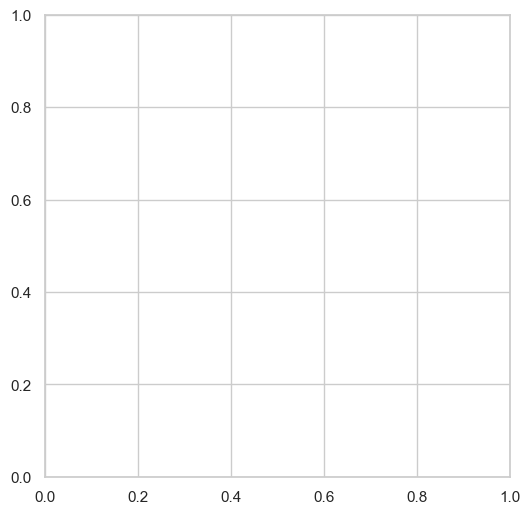

In [58]:
fig, ax = plt.subplots(figsize=(6, 6))
# ConfusionMatrixDisplay(xgboost, X_test, y_test, cmap="Blues", ax=ax)
ConfusionMatrixDisplay(xgboost)
plt.savefig("conf.png", dpi=400)
plt.show()

In [59]:
y_pred = xgboost.predict(X_test)

In [60]:
from sklearn.metrics import recall_score


recall_score(y_test, y_pred)

0.8007662835249042

In [ ]:
import pickle
pickle.dump(xgboost, open("xgboost.pkl","wb"))